In [1]:
# step 0: install scikit learn
#     py -m pip install scikit-learn
#     py -m pip install graphviz

# load libraries
import pandas as pd
from sklearn import tree # package to make decision tree
from sklearn.tree import export_graphviz
import numpy as np
import graphviz

# read in data file
df = pd.read_excel("/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/lung_cancer_tlb.xlsx")

In [2]:
# SET UP
# keep only control and adenocarcinoma
df['CancerType'] = np.where(df['CancerType'].isna(), 'Control', df['CancerType'])

df_tree = df[(df['CancerType'] == 'Control') | (df['CancerType'] == 'Adenocarcinoma')]

In [3]:
# summary of samples being predicted
df_tree.groupby('CancerType')['pub_id'].nunique()

CancerType
Adenocarcinoma    72
Control           51
Name: pub_id, dtype: int64

[Text(0.359375, 0.95, 'x[395] <= 0.0\ngini = 0.485\nsamples = 123\nvalue = [72, 51]'),
 Text(0.203125, 0.85, 'x[430] <= -0.002\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.140625, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.265625, 0.75, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.515625, 0.85, 'x[48] <= 0.006\ngini = 0.444\nsamples = 105\nvalue = [70, 35]'),
 Text(0.390625, 0.75, 'x[123] <= 0.011\ngini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.328125, 0.65, 'x[300] <= 0.175\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.265625, 0.55, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.390625, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.453125, 0.65, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.640625, 0.75, 'x[430] <= 0.001\ngini = 0.498\nsamples = 70\nvalue = [37, 33]'),
 Text(0.578125, 0.65, 'x[437] <= -0.005\ngini = 0.488\nsamples = 57\nvalue = [24, 33]'),
 Text(0.515625, 0.55, 'gini = 0.0\nsamples = 6\nvalue 

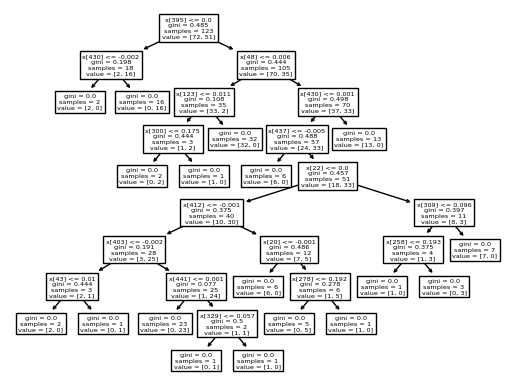

In [4]:
# create separate dfs for features and labels, both stores as pandas df
# allegedly skl ignores index columns (chatgpt)

features = df_tree.drop(['CancerType', 'pub_id', 'sample_id'], axis=1)
labels = df_tree['CancerType']

# initiate classifier
clf = tree.DecisionTreeClassifier()

# fit the tree
clf = clf.fit( features, labels )

# view the tree - ugly graphic. exploring other options
tree.plot_tree(clf)

In [5]:
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=features.columns,  # Replace with your feature names
                           class_names=labels.unique(),   # Replace with your class names
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)

# Render and display the decision tree
graph.render("decision_tree.pdf")  # Saves the tree as "decision_tree.pdf" or another format
graph.view("decision_tree.pdf")


'decision_tree.pdf.pdf'

To make a better image: go this this website
https://graphviz.gitlab.io/download/

Download the windows installer. Then run the code above.